# King County Housing Bargain Hunting Overview

## Problem Statement and Approach

Housing prices in King County, WA have been exploding over the past decade due to many factors including the availability of great jobs, a rich culture, and a plethora of outdoor recreation opportunities in the surrounding areas. It is now harder than ever for house hunters to find a bargain in what seems like is a perpetual seller's market.


Now let's take a look at the column descriptions which are summarized below.

- id - unique identifier for a house
- dateDate - data house was sold
- pricePrice - is prediction target
- bedroomsNumber - of Bedrooms/House
- bathroomsNumber - of bathrooms/House
- sqft_livingsquare - footage of the home
- sqft_lotsquare - footage of the lot
- floorsTotal - floors (levels) in house
- waterfront - House which has a view to a waterfront
- view - Has been viewed
- condition - How good the condition is on scale of 1-5 ( Overall )
- grade - overall grade given to the housing unit on scale of 0-10
- sqft_above - living square footage of house apart from basement
- sqft_basement - living square footage of the basement
- yr_built - Built Year
- yr_renovated - Year when house was renovated
- zipcode - zip
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the - nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## This Notebook will show basic examples of:

## Data Handling
 - Importing Data with Pandas
 - Cleaning Data
 - Exploring Data through Visualizations with Matplotlib

## Data Analysis
 - Automated fast track EDA/ visualisation
 - Automated Machine Learning (Regression) and Neural Network analysis



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math

sys.path.append("..")

from EDA_ML_Package.ML_functions import ML_models
from EDA_ML_Package.NN_functions import ANN_tabular_class


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 15)


C:\Users\user\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\user\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\user\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# ------------------- Importing Data and classes ------------------------------

ML = ML_models()
ΝΝ = ANN_tabular_class()

df = pd.read_csv('kc_house_data.csv')



--------------------------------------------------------------


In [3]:
def descriptive_analysis(data, target_attribute='none'):
    """ A table is created with the characteristics of a dataframe
    The table is printed in the pdf report

    Parameters
    ----------
    df: (dataframe)
    target_attribute: (str) optional

    Output: table
    """
    
    # 1. Print describe()
    print(data.describe())
    
    df = round(data.copy(deep=True), 2)

    # 2. Print df size
    print('\nnumber of attributes: ', len(df.columns), '/ number of instances: ', len(df), '\n')

    # tc: table characteristics
    tc = pd.DataFrame(df.isnull().sum(), columns=['NaN'])
    tc['NaN %'] = round(tc['NaN']/len(df)*100, 1)
    tc['memory'] = df.memory_usage(deep=True)
    tc['Unique'] = [len(df[i].unique()) for i in list(df.columns)]
    tc['type'] = df.dtypes

    indexValue = 3
    tc['values'] = [df[clm].unique().tolist()[:indexValue] for clm in list(df.columns)]

    # for i, vl_list in enumerate(df.values):
    #    sm['values'].iloc[i] = [round(vl, 3) for vl in vl_list]

    for x, vl in enumerate(tc['values']):
        if tc['Unique'].iloc[x] > 3:
            vl.append('...')
        for i, y in enumerate(vl):
            if len(str(y)) > 10:
                try:
                    vl[i] = y[:10] + '..'
                except Exception:
                    pass
    tc = tc.reset_index()
    tc = tc.astype(str)

    # 3. print table characteristics
    print(tc)

    if target_attribute != 'none':
        attribute_range(df, target_attribute)

def attribute_range(data, target_attribute):
    """ A table is created with the range of values of an attribute
    The table is printed in the pdf report

    Parameters
    ----------
    df: (dataframe)
    target_attribute: (str)

    Output: -
    """
    df = data.copy(deep=True)
    dx = DA.groupby_count_percentage(df, [target_attribute])
    print('\nValue Distribution of the Target attribute\n')
    print(dx)
    return dx



In [4]:
descriptive_analysis(df)

# ------------------- Data Cleansing ------------------------------

df = df.drop('id', axis=1)
df = df.drop('date', axis=1)
df = df.drop('zipcode', axis=1)



X = df.drop(['price'], 1)
y = df['price']


                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors  ...      yr_built  yr_renovated  \
count  2.161300e+04  21613.000000  ...  21613.000000  21613.000000   
mean   1.510697e+04      1.494309  ...   1971.005136     84.402258   
std    4.142051e+04      0.539989  ...     29.373411    401.679240   
min    5

In [5]:
def nan_heatmap(data):
    """ Creates a bar plot that compares 2 attributes, eg a random att vs
    the target attribute

    Parameters
    ----------
    df: (dataframe)

    Output:
    """
    fig, axes = plt.subplots(figsize=(10, 8))
    clmns = data.columns.tolist()
    if len(clmns) > 10:
        clmns1 = clmns[0:round(len(clmns)/2)]
        nht1 = sns.heatmap(data[clmns1].isnull(), cmap="viridis", yticklabels=False, cbar=False)
        plt.show()
        nht1.set_xticklabels(nht1.get_xmajorticklabels(), fontsize=18)
        figure = nht1.get_figure()

        fig, axes = plt.subplots(figsize=(10, 8))
        clmns2 = clmns[round(len(clmns)/2):-1]
        nht2 = sns.heatmap(data[clmns2].isnull(), cmap="viridis", yticklabels=False, cbar=False)
        plt.show()
        nht2.set_xticklabels(nht2.get_xmajorticklabels(), fontsize=18)
        figure = nht2.get_figure()
    else:
        nht = sns.heatmap(data[clmns].isnull(), cmap="viridis", yticklabels=False, cbar=False, )
        plt.show()
        nht.set_xticklabels(nht.get_xmajorticklabels(), fontsize=18)
        figure = nht.get_figure()


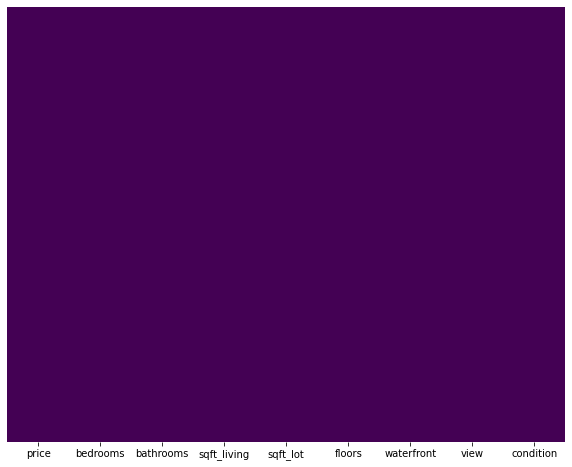

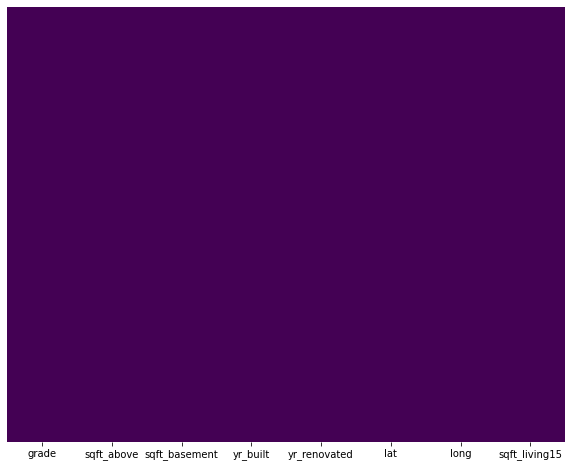

In [6]:
nan_heatmap(df)

In [7]:
def heatmap_corr_plot(data, listColmRemove=[]):

    data_columns = data.columns.tolist()

    if listColmRemove != []:
        for colm in listColmRemove:
            data_columns.remove(colm)

    data = data[data_columns]

    mask = np.triu(data.corr())
    plt.figure(figsize=(15, 6))
    sns.heatmap(round(data.corr(), 2), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
    # plt.ylim(18, 0)
    plt.title('Correlation Matrix Heatmap')
    plt.show()


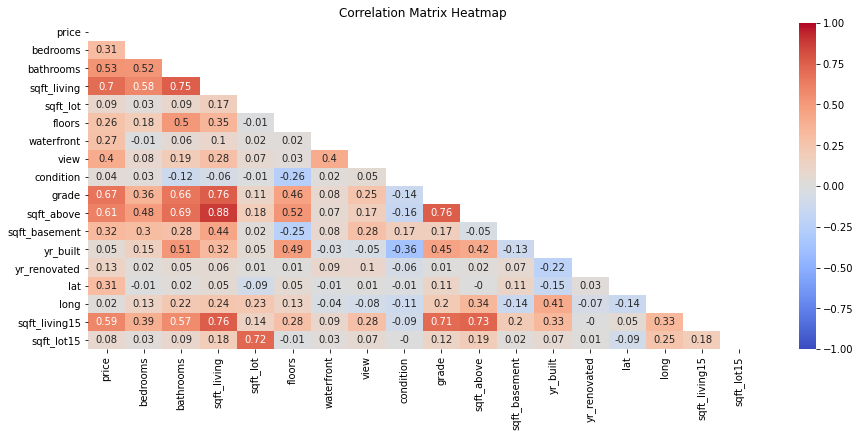

In [8]:
heatmap_corr_plot(df)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

df_copy = df.copy(deep=True)
vif_data = pd.DataFrame()
df_copy = sm.add_constant(df_copy)
vif_data["feature"] = df_copy.columns
vif_data["VIF"] = [variance_inflation_factor(df_copy.values, i) for i in range(len(df_copy.columns))]
print(vif_data)

          feature           VIF
0           const  1.426833e+06
1           price  3.749326e+00
2        bedrooms  1.748682e+00
3       bathrooms  3.432277e+00
4     sqft_living  1.683468e+01
5        sqft_lot  6.103691e+00
6          floors  2.347596e+00
7      waterfront  1.067960e+00
8            view           NaN
9       condition  1.276573e+00
10          grade  3.235967e+00
11     sqft_above  1.613286e+01
12  sqft_basement  3.580212e+00
13       yr_built  2.654240e+00
14   yr_renovated  1.162607e+00
15            lat  1.449202e+00
16           long  1.540365e+00
17  sqft_living15  3.125713e+00
18     sqft_lot15  6.204216e+00


In [9]:
def box_hist_EDA_plots(df, plot_type='boxplot', target_att='', no_rows=-1):
    """Function that generates histogram/ box plots for the numerical attributes
    and count for the object attributes"""
    def plot_hist():
        hist_list = []
        labels_list = []
        values_list = df_copy[target_att].unique().tolist()
        values_list.sort()
        for i, val in enumerate(values_list):
            # plt.hist(df_copy.loc[df_copy[target_att] == val, col].values, **kwargs, label=str(val), color=colors[i])
            hist_list.append(df_copy.loc[df_copy[target_att] == val, col].values)
            labels_list.append(str(val))

        plt.hist(hist_list, **kwargs, label=labels_list, color=colors[0:len(hist_list)])
        plt.xticks(fontsize=12)
        plt.legend()

    df_copy = df.copy()

    # find optimum number of rows if not given
    if no_rows == -1:
        no_rows = divmod(len(df_copy.columns), 10)[0]

    # figure quality
    fig = plt.figure(figsize=(25, 5*no_rows))

    kwargs = dict(alpha=0.5, bins=20)  # , density=True, stacked=False)
    colors = ['b', 'r', 'g']

    # loop through all attributes
    for i, col in enumerate(df_copy.columns, 1):

        # numerical attributes
        if (df_copy[col].dtype == np.float64 or df_copy[col].dtype == np.int64):
            plt.subplot(no_rows, math.ceil(len(df_copy.columns)/no_rows), i)

            # box plot
            if plot_type == 'boxplot':
                plt.boxplot(df_copy[~df_copy[col].isnull()][col])
                ax = plt.gca()
                ax.axes.xaxis.set_ticklabels([])

            else:  # histogram
                if target_att != '':
                    plot_hist()
                else:
                    plt.hist(df_copy[~df_copy[col].isnull()][col])

            plt.title(col, fontsize=20)

        else:  # object attributes
            plt.subplot(no_rows, math.ceil(len(df_copy.columns)/no_rows), i)

            if len(df_copy[col].unique()) <= 15:
                if target_att != '':  # class histogram
                    df_copy[col], map_dict = DA.categorise_codes(df_copy, col)
                    plot_hist()
                    plt.text(0.35, 10, str(map_dict), size=15)
                else:  # count plot
                    sp = sns.countplot(x=col, data=df_copy)
                    plt.setp(sp.get_xticklabels(), ha="right", rotation=25, fontsize=10)
                    sp.set(xlabel=None)

            else:  # empty plot
                plt.text(0.35, 0.35, str(len(df_copy[col].unique())) + " unique values", size=15)
                ax = plt.gca()
                ax.axes.xaxis.set_ticklabels([])
            plt.title(col, fontsize=20)

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
    plt.show()
    # return fig



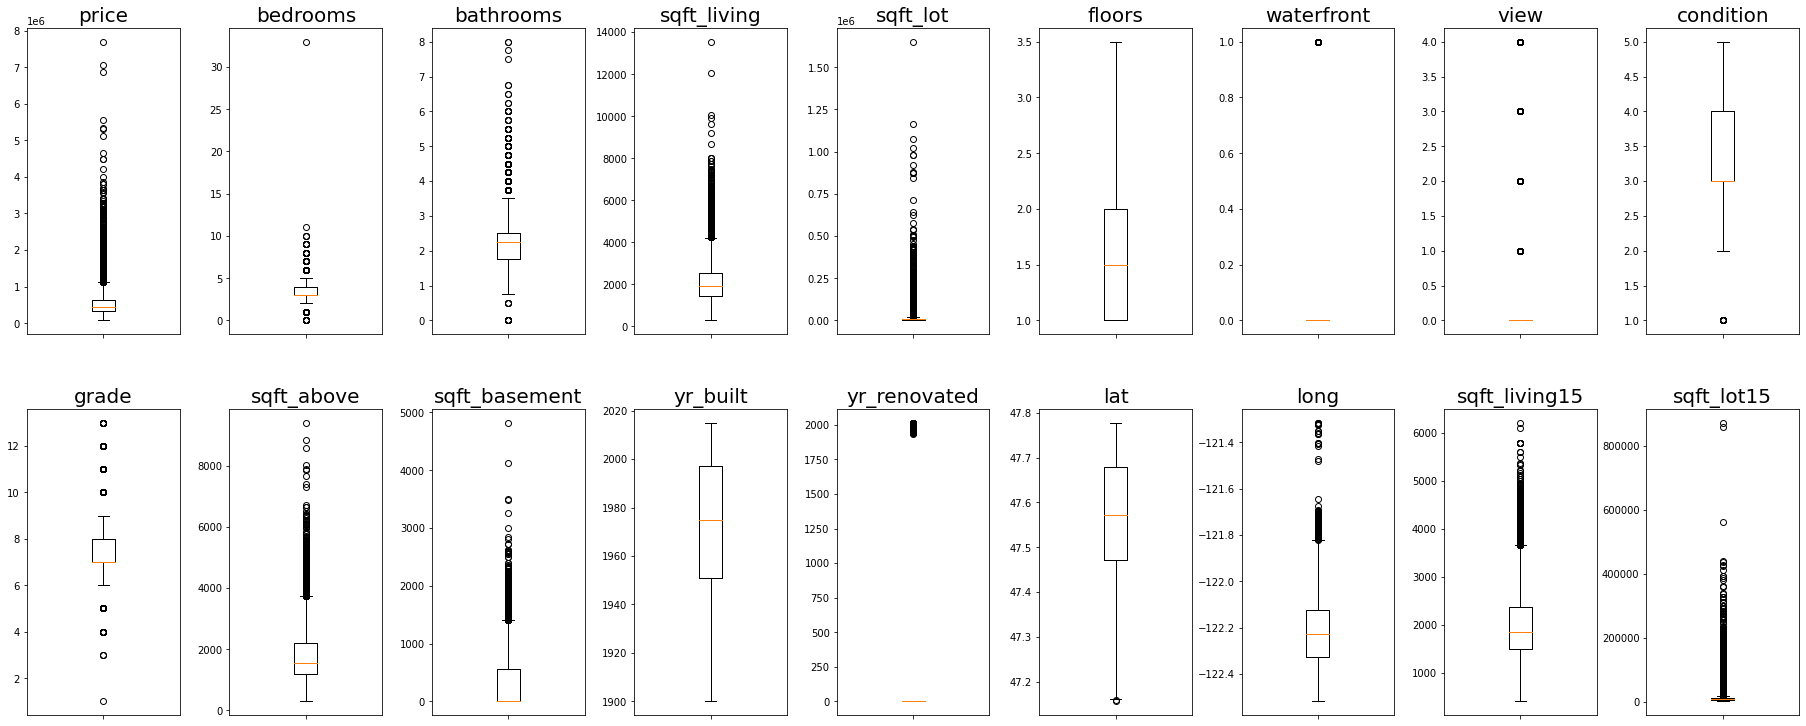

In [10]:
box_hist_EDA_plots(df, no_rows=2)

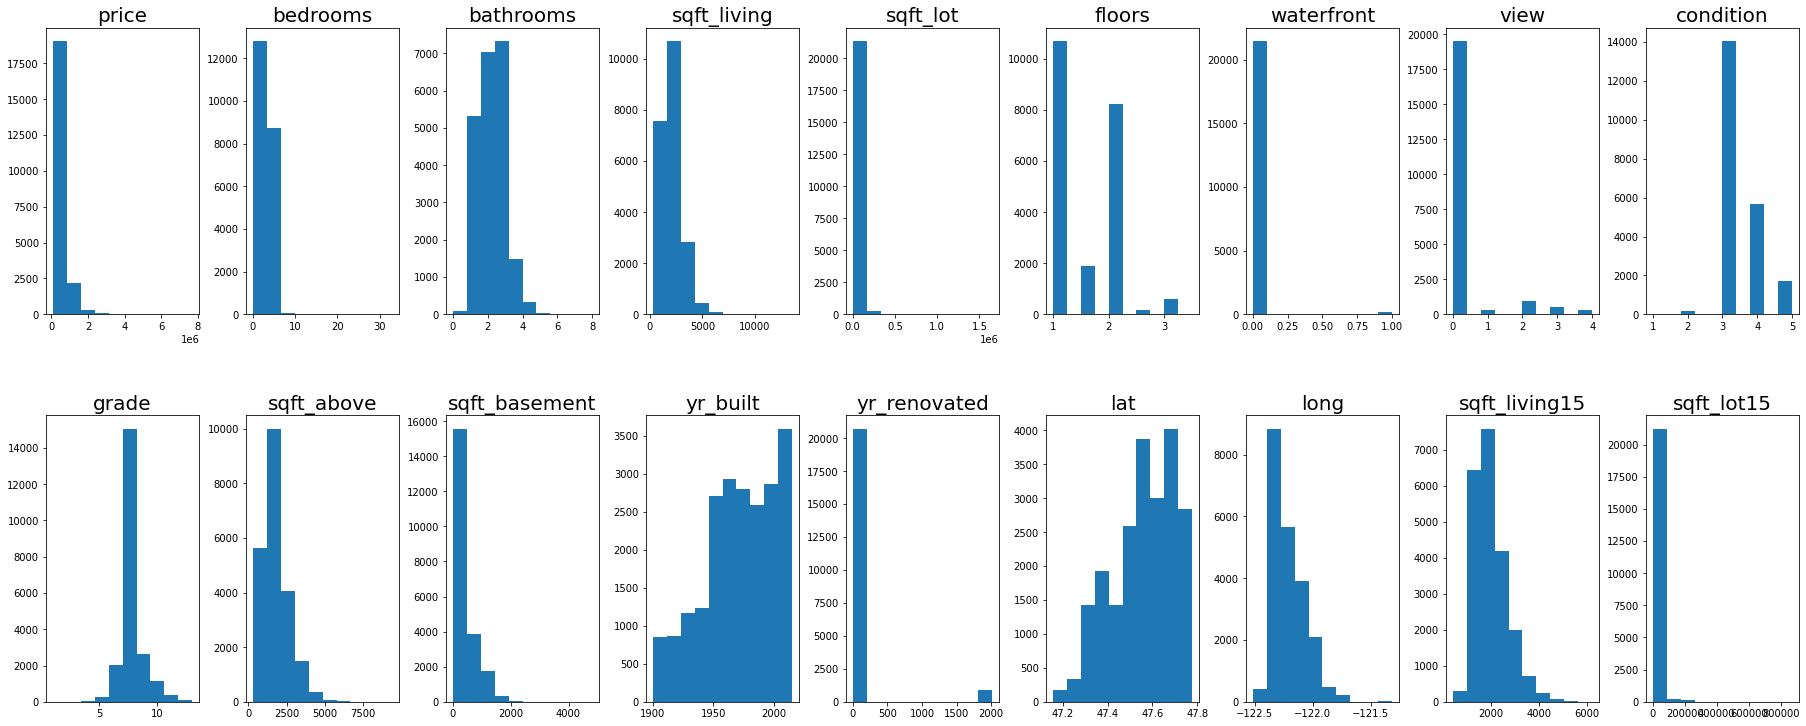

In [11]:
box_hist_EDA_plots(df, 'hist', no_rows=2)

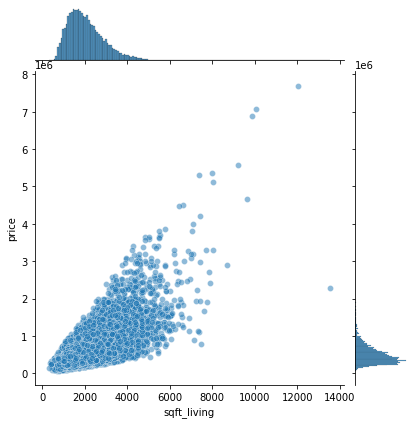

In [12]:
sns.jointplot(df.sqft_living, df.price, alpha=0.5)

### Data Cleansing

In [13]:
# 'sqft_basement' is a the zero heavy column which may cause issues for in the linear regression model
# For that reason, the 'sqft_basement' column will be created to a binary one. The Value will
# be one if a house has basement and 0 if it doesnt.

df.loc[df.sqft_basement > 0, "sqft_basement"] = 1
df.loc[df.sqft_basement == 0, "sqft_basement"] = 0


# The next step in the feature anaylysis is to remove the outliers using the winsorize method

In [14]:
from scipy.stats.mstats import winsorize

def outlier_winsorize(data, list_exclude=[]):
    for col in data.columns:
        if col not in list_exclude:
            try:

                # q75, q25 = np.percentile(data[col], [75, 25])
                q75, q25 = np.percentile(data[~data[col].isnull()][col], [75, 25])
                # q95, q05 = np.percentile(data[col], [95, 5])
                iqr = q75 - q25
                min_val = q25 - (iqr*1.5)
                max_val = q75 + (iqr*1.5)

                outlier_count_lower = len(np.where((data[col] < min_val))[0])
                outlier_count_upper = len(np.where((data[col] > max_val))[0])
                outlier_percent_lower = round(outlier_count_lower/len(data[col])*100, 2)
                outlier_percent_upper = round(outlier_count_upper/len(data[col])*100, 2)
                print(15*'-' + col + 15*'-')
                print('Number of outliers lower: {}'.format(outlier_count_lower))
                print('Number of outliers upper: {}'.format(outlier_count_upper))
                print('Percent of data that is outlier lower: {}%'.format(outlier_percent_lower))
                print('Percent of data that is outlier upper: {}%'.format(outlier_percent_upper))

                wins_data = winsorize(data[col], limits=(outlier_percent_lower/100, outlier_percent_upper/100))
                data[col] = wins_data
            except Exception:
                pass
    return data

In [15]:
df = outlier_winsorize(df, list_exclude=['long', 'lat', 'zipcode', 'yr_renovated', 'yr_built'])


---------------price---------------
Number of outliers lower: 0
Number of outliers upper: 1146
Percent of data that is outlier lower: 0.0%
Percent of data that is outlier upper: 5.3%
---------------bedrooms---------------
Number of outliers lower: 212
Number of outliers upper: 334
Percent of data that is outlier lower: 0.98%
Percent of data that is outlier upper: 1.55%
---------------bathrooms---------------
Number of outliers lower: 14
Number of outliers upper: 557
Percent of data that is outlier lower: 0.06%
Percent of data that is outlier upper: 2.58%
---------------sqft_living---------------
Number of outliers lower: 0
Number of outliers upper: 572
Percent of data that is outlier lower: 0.0%
Percent of data that is outlier upper: 2.65%
---------------sqft_lot---------------
Number of outliers lower: 0
Number of outliers upper: 2425
Percent of data that is outlier lower: 0.0%
Percent of data that is outlier upper: 11.22%
---------------floors---------------
Number of outliers lower:

<Figure size 576x576 with 0 Axes>

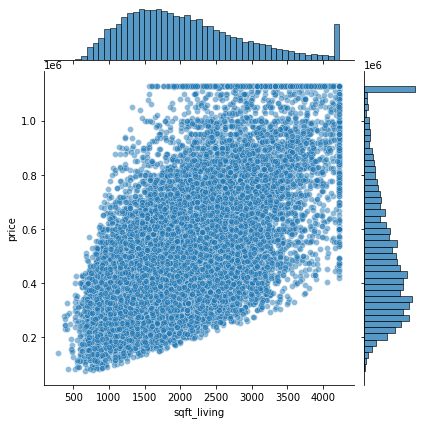

In [16]:
plt.figure(figsize=(8, 8))
sns.jointplot(df.sqft_living, df.price, alpha=0.5)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()

<AxesSubplot:xlabel='long', ylabel='lat'>

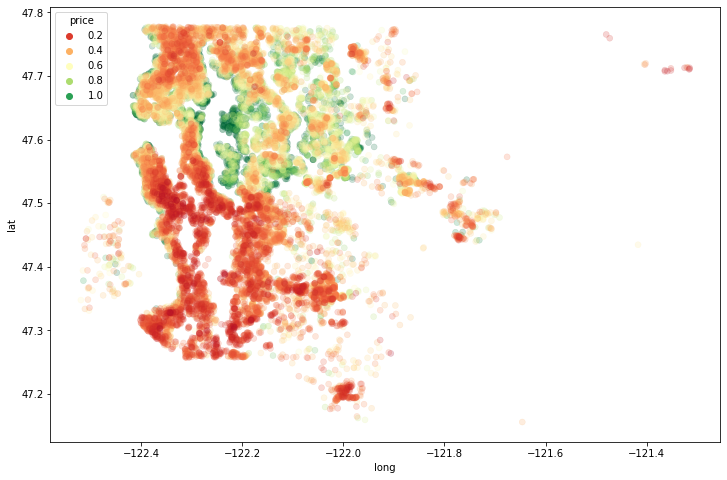

In [17]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[int(len(df)*0.01):]
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat',
                data=non_top_1_perc, hue='price',
                palette='RdYlGn', edgecolor=None, alpha=0.2)


In [18]:
bath = ['bathrooms', 'bedrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[bath[0]], df[bath[1]]).style.background_gradient(cmap=cm)


bedrooms,1,2,3,4,5
bathrooms,,,,,
0.5,11,2,0,1,0
0.75,28,26,16,2,0
1.0,139,1558,1780,325,50
1.25,2,3,4,0,0
1.5,13,294,829,254,56
1.75,4,304,1870,719,151
2.0,6,216,1048,525,135
2.25,4,118,1082,709,134
2.5,5,197,2357,2502,319


In [19]:
# ------------------- ML Analysis ------------------------------
X = df.drop(['price'], 1)
y = df['price']

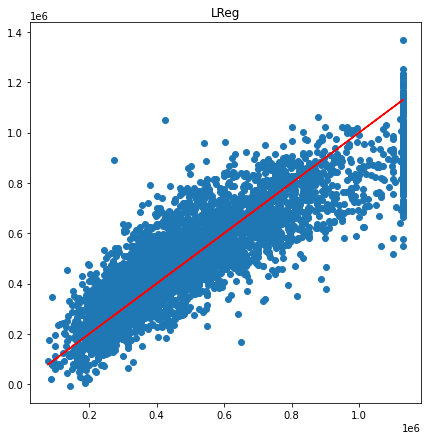

<Figure size 576x576 with 0 Axes>

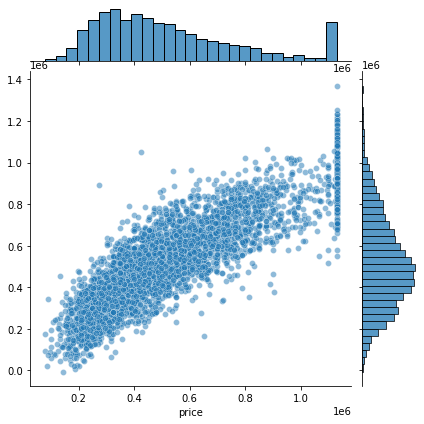

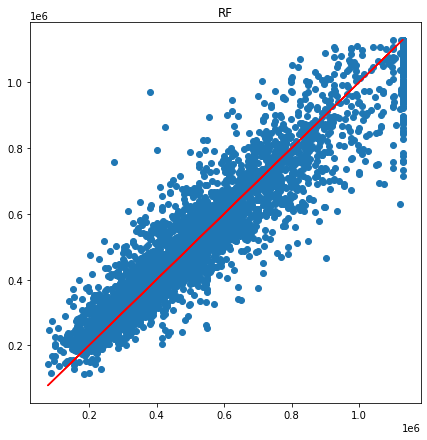

<Figure size 576x576 with 0 Axes>

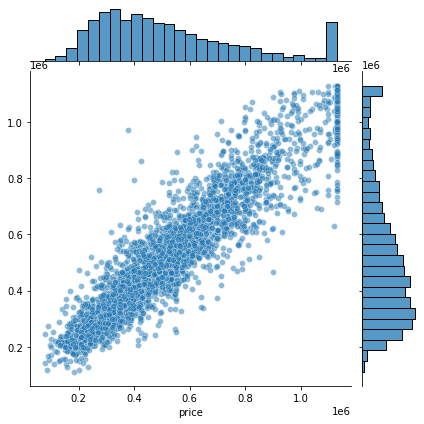

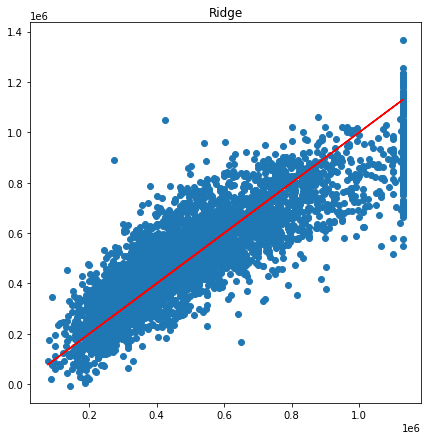

<Figure size 576x576 with 0 Axes>

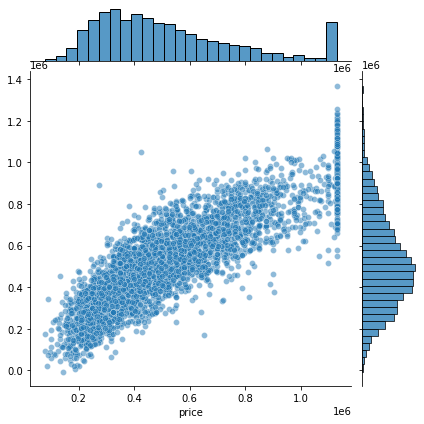

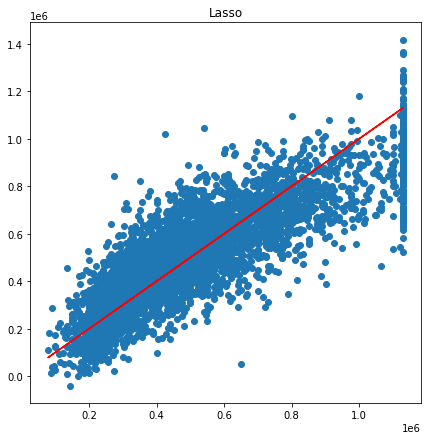

<Figure size 576x576 with 0 Axes>

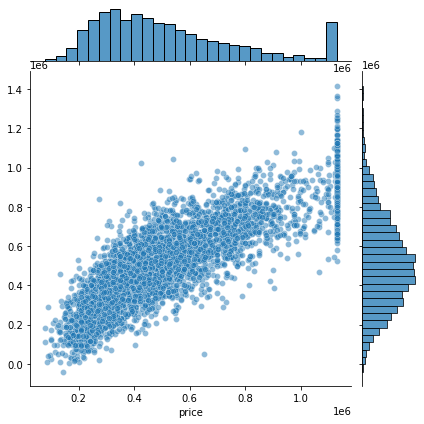

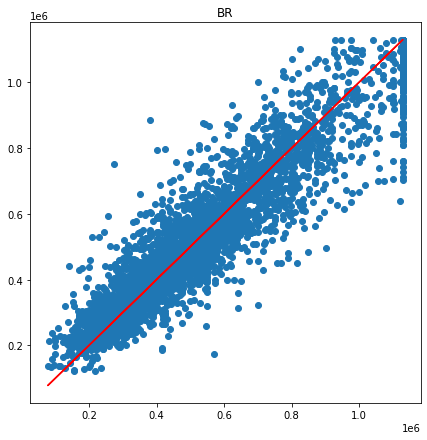

<Figure size 576x576 with 0 Axes>

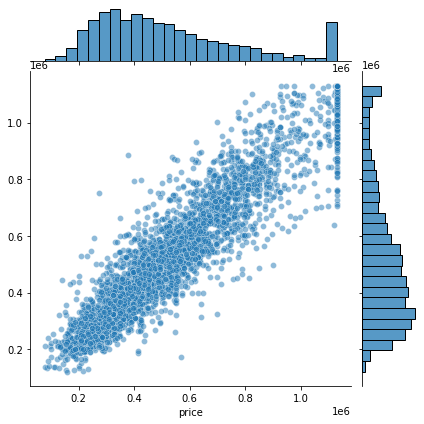

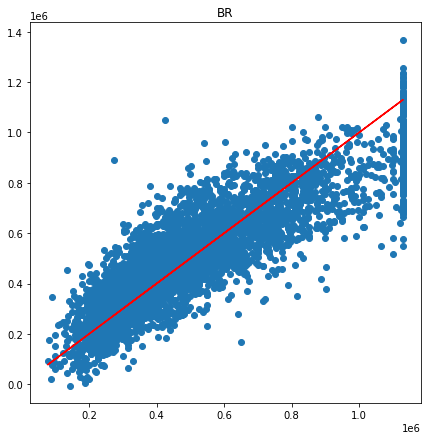

<Figure size 576x576 with 0 Axes>

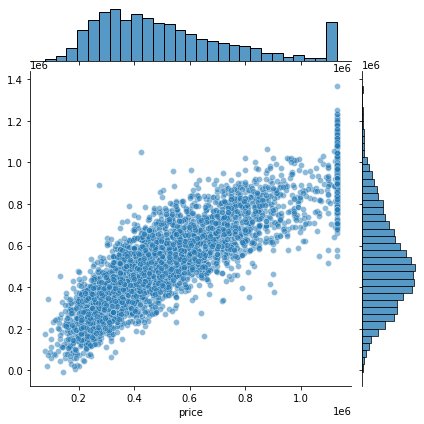

[17:51:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:51:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


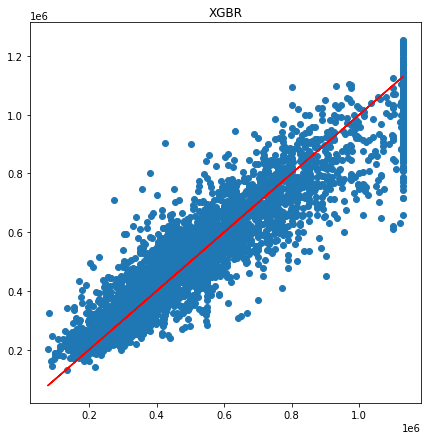

<Figure size 576x576 with 0 Axes>

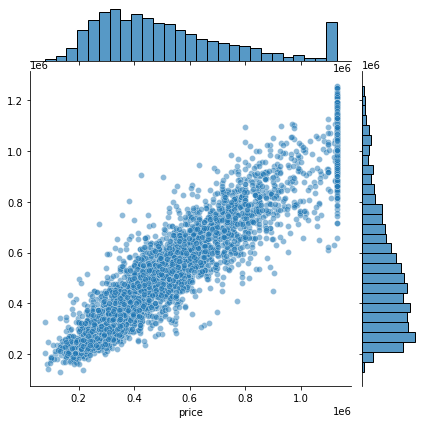

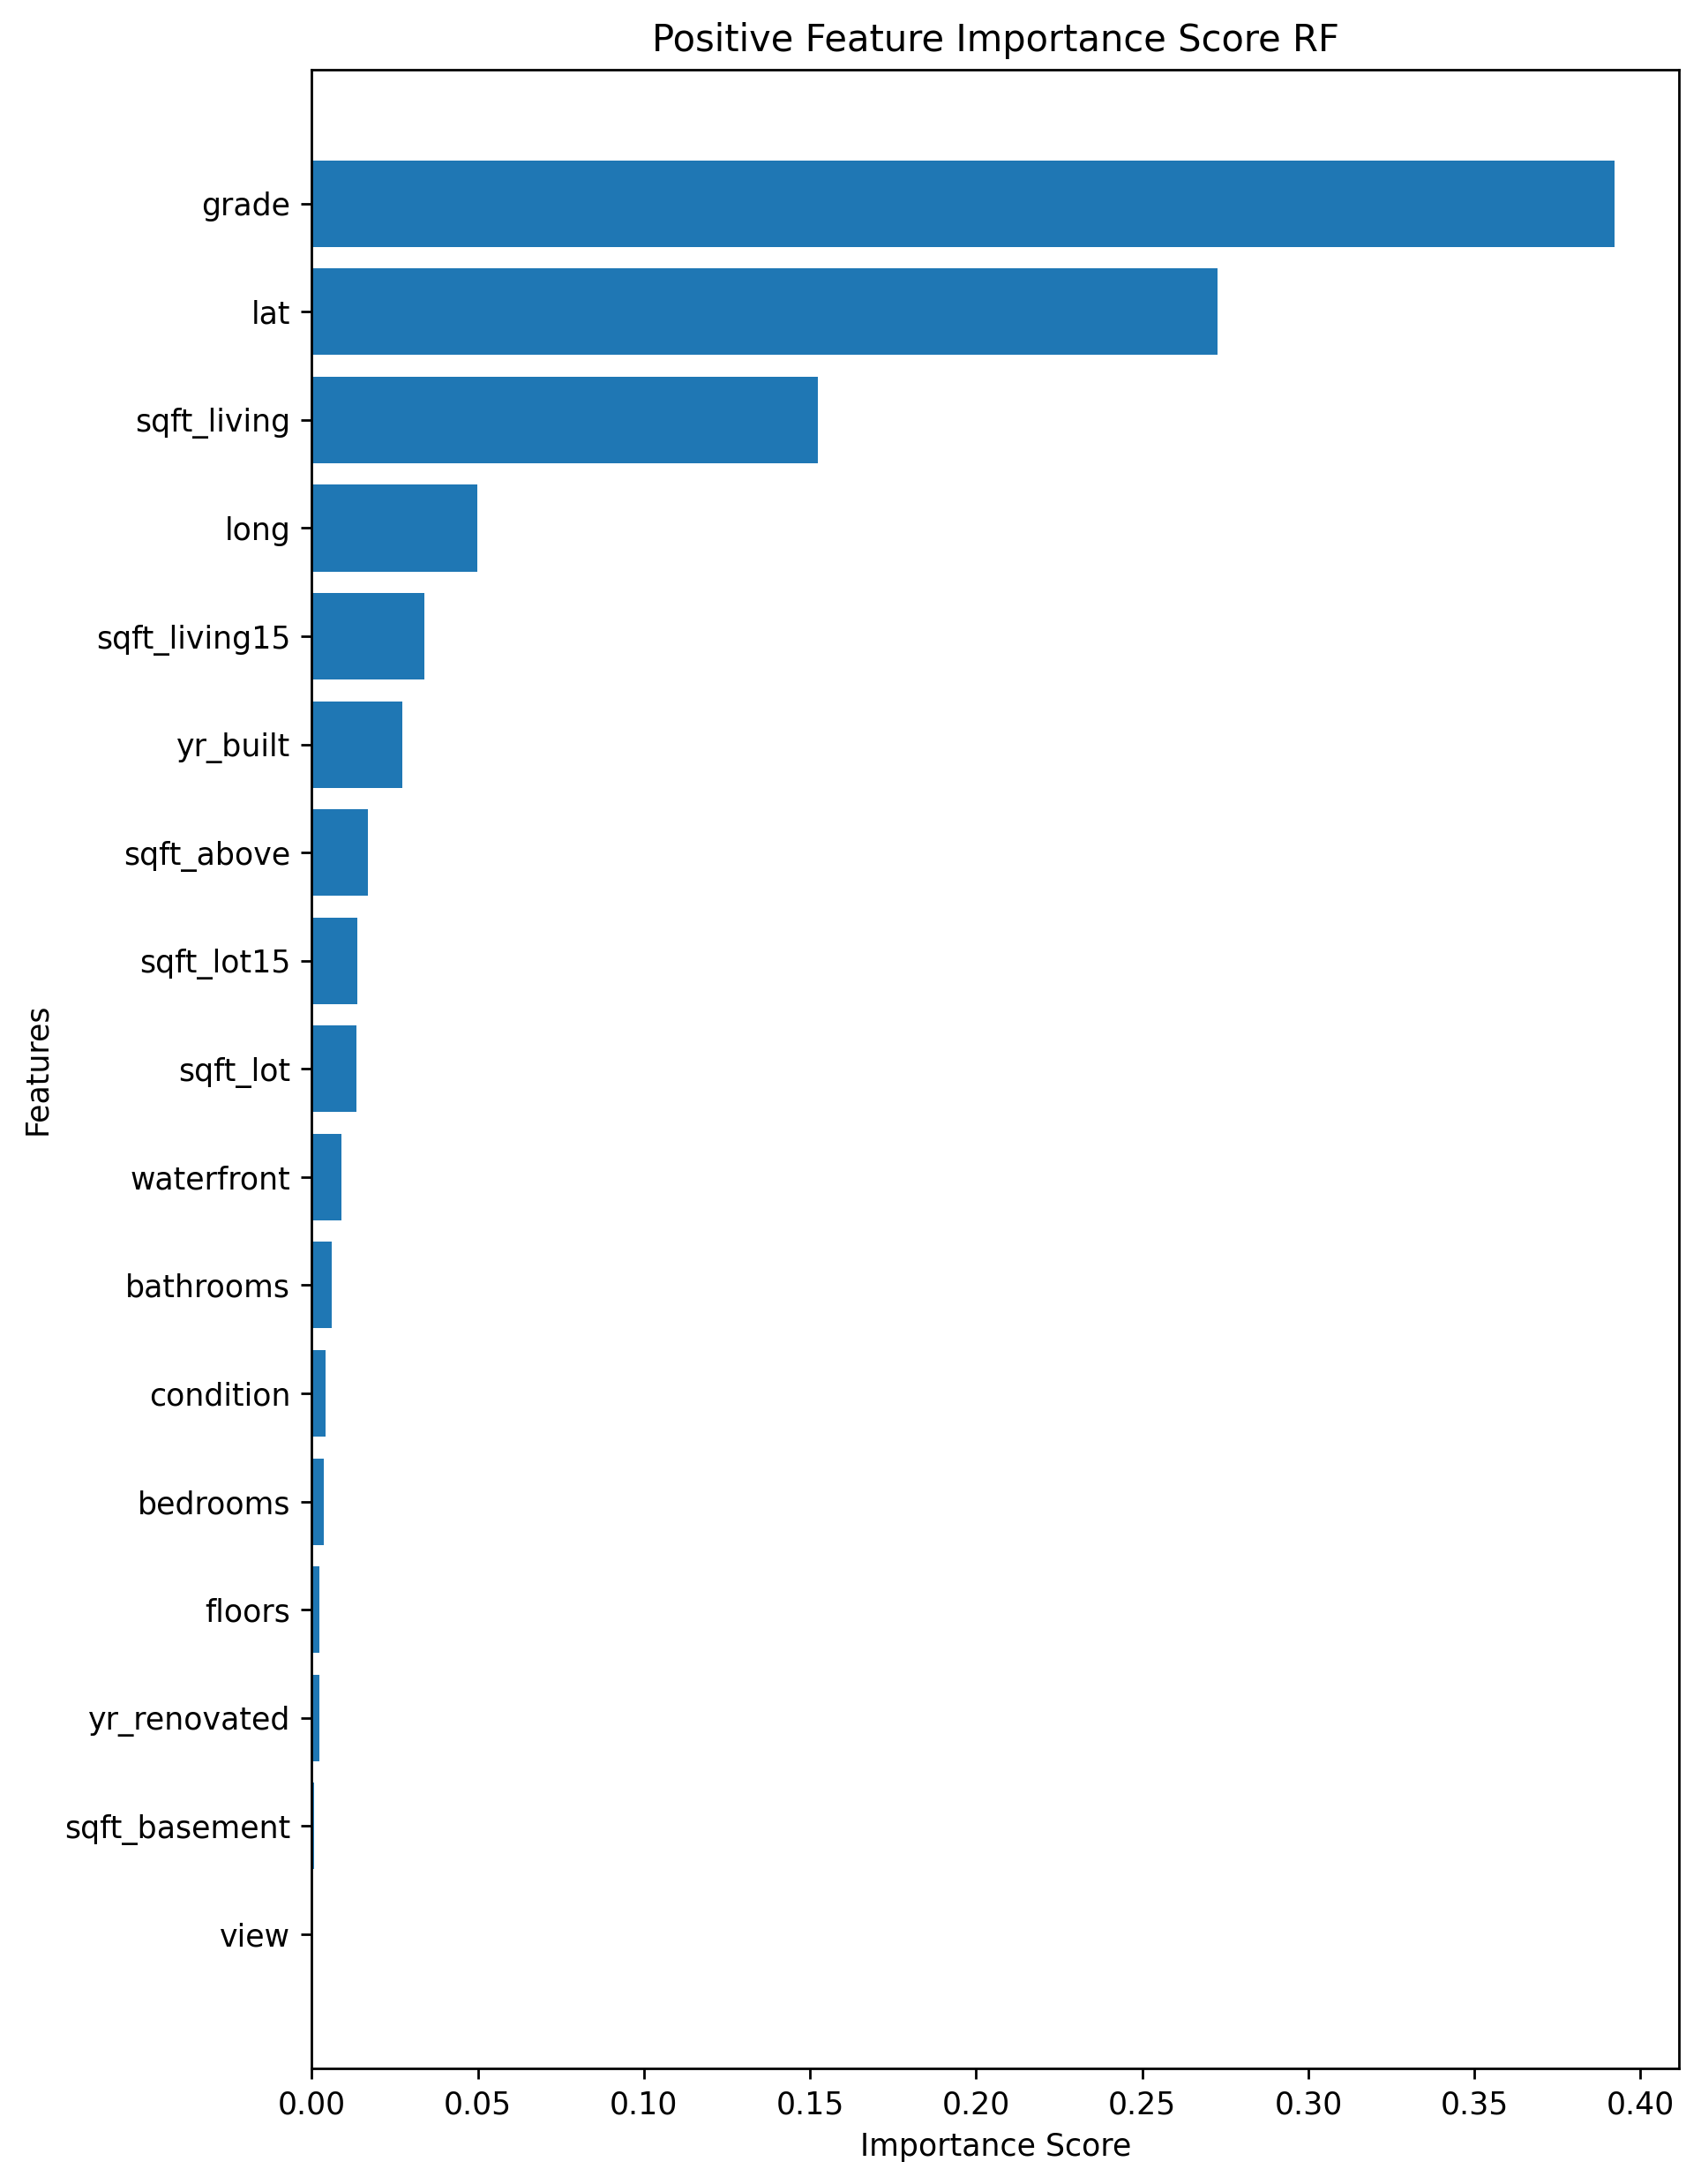


 ================ ML Analysis Completed ================
    model         mae        rmse     r2 dtype           mse  fit_tm  \
1      RF   56654.321   82833.678  0.892  test           NaN     NaN   
4      BR   60176.246   87198.190  0.881  test           NaN     NaN   
6    XGBR   65659.660   92029.905  0.867  test           NaN     NaN   
0    LReg   98984.517  129574.629  0.737  test           NaN     NaN   
2   Ridge   98981.992  129574.833  0.737  test           NaN     NaN   
5      BR   98983.239  129574.614  0.737  test           NaN     NaN   
3   Lasso  106186.694  138561.534  0.699  test           NaN     NaN   
8      RF   57653.941   85158.761  0.883    cv  7.255844e+09   8.985   
11     BR   60950.641   89370.023  0.872    cv  7.992087e+09   0.869   
13   XGBR   64689.547   90928.568  0.867    cv  8.271519e+09   1.236   
7    LReg   98213.054  129186.875  0.732    cv  1.669050e+10   0.014   
9   Ridge   98208.306  129186.654  0.732    cv  1.669042e+10   0.008   
12    

<Figure size 432x288 with 0 Axes>

In [21]:
resultsML = ML.ML_Basic_Models_Regression(X, y)